# REGRESSION ANALYSIS  
# 1.Linear Regression Algorithm

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data1=pd.read_csv(r"C:\Users\Shaik.AbdulRazak\OneDrive\Documents\Raw data\placement_data.csv")
data1.head()

,Cgpa,Package
0,6.87,12.21
1,9.75,22.55
2,8.66,24.33
3,7.99,20.76
4,5.78,15.66


In [58]:
data1.isnull().sum()

Cgpa       0
Package    0
dtype: int64

In [59]:
# if we work with the data then the data must be in 2 dimensions
x=data1[["Cgpa"]]
x.ndim

2

In [60]:
x=data1[["Cgpa"]]
y=data1["Package"]

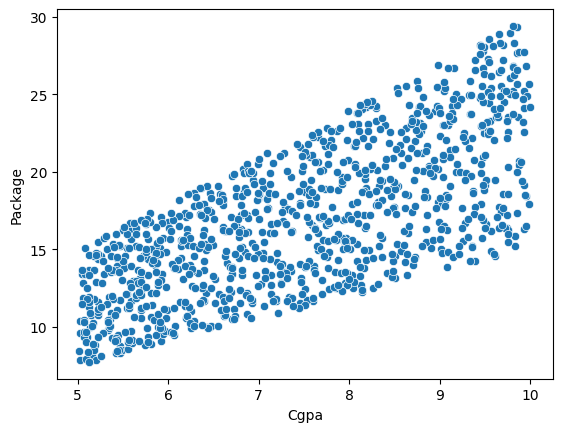

In [61]:
# then we check if the data can follow the linearity or not
sns.scatterplot(x="Cgpa", y="Package", data=data1)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
lr.predict([[6.87]])

c:\Users\Shaik.AbdulRazak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.57315544])

In [65]:
# y=mx+c
# y=2.3602944 * 6.87 -0.6420670807537974

In [66]:
lr.coef_

array([2.3602944])

In [67]:
lr.intercept_

np.float64(-0.6420670807537974)

In [68]:
y_pred = lr.predict(x)

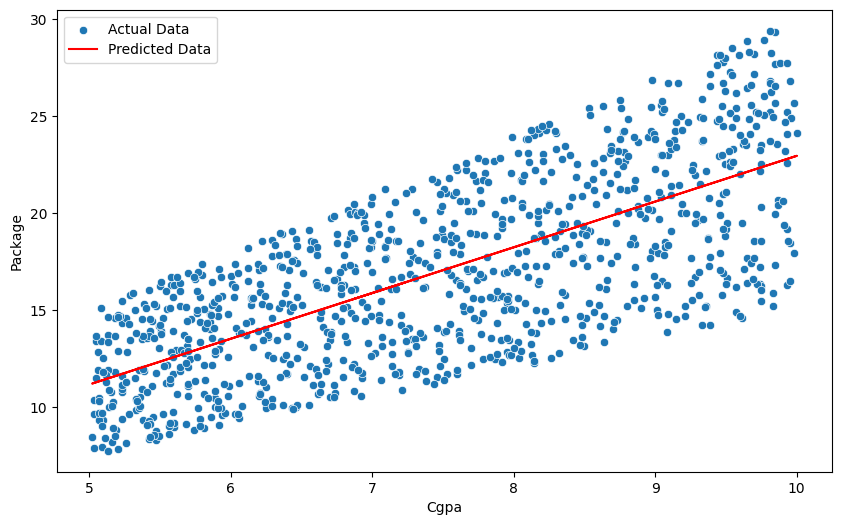

In [69]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="Cgpa",y="Package",data=data1)
plt.plot(data1["Cgpa"],y_pred, color='red')

plt.legend(["Actual Data", "Predicted Data"])
plt.show()

# 2.Multiple Linear Regression

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
data2=pd.read_csv(r"C:\Users\Shaik.AbdulRazak\OneDrive\Documents\Raw data\regression_dataset.csv")
data2.head()

,Age,Experience,Salary
0,60,39,142352
1,50,30,112551
2,36,15,74711
3,29,6,43707
4,42,24,100687


In [72]:
data2.shape

(1500, 3)

In [73]:
data2.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

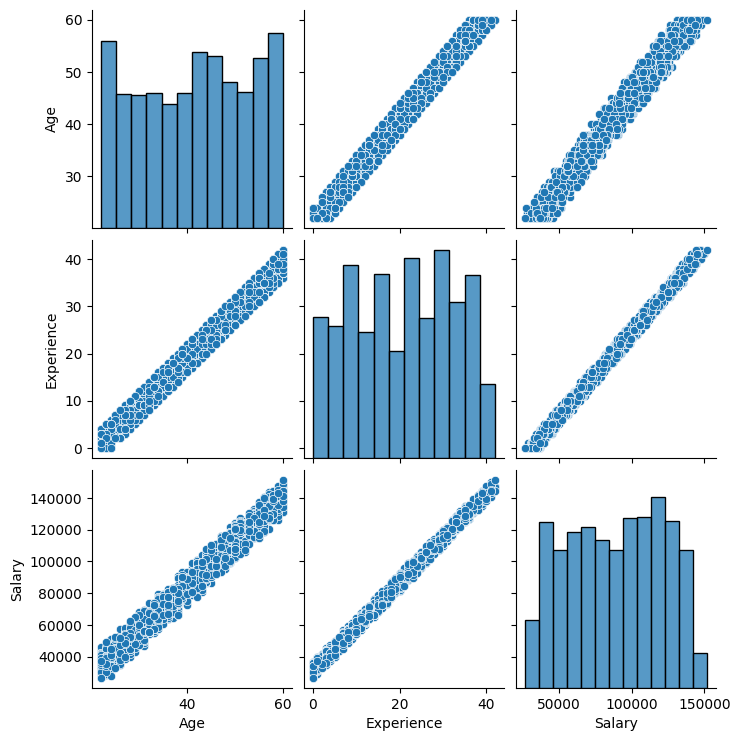

In [74]:
sns.pairplot(data=data2)
plt.show()

In [75]:
x=data2.iloc[:,:-1]
x

,Age,Experience
0,60,39
1,50,30
2,36,15
3,29,6
4,42,24
...,...,...
1495,46,22
1496,45,27
1497,33,13
1498,39,20


In [76]:
x.ndim # must be in 2 dimensional

2

In [77]:
x=data2.iloc[:,:-1]
y=data2["Salary"]

In [78]:
data2.shape

(1500, 3)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
# Building the model
from sklearn.linear_model import LinearRegression

In [81]:
lr1=LinearRegression()
lr1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
lr1.score(x_test,y_test)*100

99.22182118915

In [83]:
# y = m1x1 + m2x2 + c 

In [84]:
# y = 408.96558882 * Age - 2383.77404073 * Experience + 22718.03643337355

In [85]:
lr1.coef_

array([ 408.96558882, 2383.77404073])

In [86]:
lr1.intercept_

np.float64(22718.03643337355)

In [87]:
lr1.predict(x_test)

array([125441.5300255 ,  52421.3340685 , 131435.97487341, 105483.38702986,
       108276.12665941, 112704.72864423,  60799.55295714,  60799.55295714,
        83959.40117114,  89544.88043023,  93973.48241506,  37709.72423533,
       120673.98194405, 102351.70130369,  99149.99608533, 121491.91312169,
       139814.19376205,  36891.79305769,  60051.64127169,  32124.24497624,
       132253.90605105, 114679.53709614, 137839.38531014,  91180.74278551,
        56849.93605333,  74763.25110486, 123466.7215736 ,  54875.12760142,
        46087.94312396, 119856.05076641, 130618.04369577,  50037.56002777,
        87161.1063895 ,  37709.72423533,  48471.71716469, 108276.12665941,
       118699.17349214,  31715.27938742, 132662.87163987,  55623.03928686,
       115497.46827378, 111068.86628895,  93973.48241506,  65637.12053078,
       120265.01635523,  73606.3738306 ,  51673.42238305,  41659.34113914,
       119856.05076641,  79191.85308969,  65228.15494196, 114270.57150732,
       127486.3579696 ,  

# 3.Polynomial Regression

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
data3=pd.read_csv(r"C:\Users\Shaik.AbdulRazak\OneDrive\Documents\Raw data\polynomial_dataset_like_example.csv")
data3.head()

,Level,Salary
0,1,1989
1,2,3827
2,3,3465
3,4,7054
4,5,11005


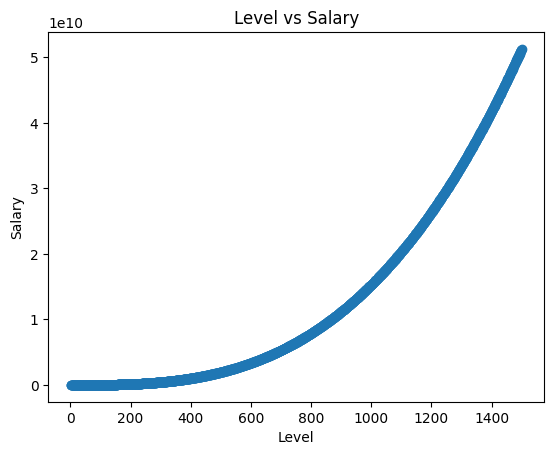

In [90]:
plt.scatter(data3["Level"], data3["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Level vs Salary")
plt.show()

In [91]:
data3.corr()

,Level,Salary
Level,1.000000,0.917475
Salary,0.917475,1.000000


In [92]:
# Then we use the Polynomial Regression

x=data3[["Level"]]
y=data3["Salary"]

In [93]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)  # You can change the degree as needed
pf.fit(x)

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [94]:
pf.transform(x)

array([[1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00],
       [1.000000e+00, 3.000000e+00, 9.000000e+00],
       ...,
       [1.000000e+00, 1.498000e+03, 2.244004e+06],
       [1.000000e+00, 1.499000e+03, 2.247001e+06],
       [1.000000e+00, 1.500000e+03, 2.250000e+06]], shape=(1500, 3))

In [95]:
x=pf.transform(x)

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [97]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
# to check the accuracy of the model
lr2.score(x_test, y_test)*100

99.56950973923675

In [99]:
# y = m1x1 + m2x2^2 + c

In [100]:
lr2.coef_

array([        0.        , -20268856.31941383,     34096.34018479])

In [101]:
lr2.intercept_

np.float64(2516240935.5595646)

In [102]:
# y = -20268856.31941383 * x1 + 34096.34018479 * x2^2 + 2516240935.5595646

In [103]:
prd=lr2.predict(x) 

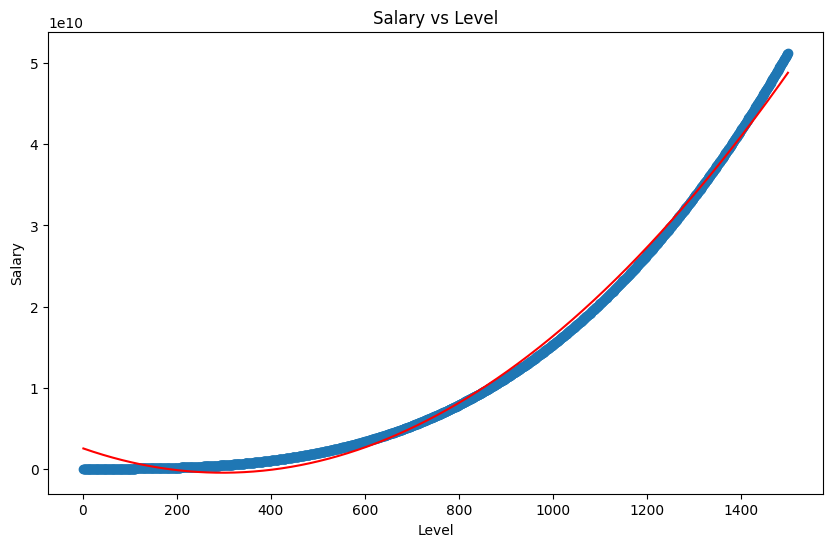

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(data3["Level"], data3["Salary"])
plt.plot(data3["Level"], prd, color='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary vs Level")
plt.show()

In [105]:
# to predict a new value in the model
new_level = 6.5  # Example level to predict
new_data = pf.transform([[new_level]])  

c:\Users\Shaik.AbdulRazak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [107]:
lr2.predict(new_data)

array([2.38593394e+09])